In [1]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [3]:
from keras.models import load_model
model = load_model("models/heart_model.keras")

I0000 00:00:1755572286.970104    3135 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2123 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 173)            │         2,422 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 173)            │           173 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 173)            │           692 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 173)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 71)             │        12,354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 71)             │            71 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 71)             │           284 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 71)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         3,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 46)             │            46 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46)             │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 46)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            47 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,597 (224.99 KB)

 Trainable params: 19,005 (74.24 KB)

 Non-trainable params: 580 (2.27 KB)

 Optimizer params: 38,012 (148.49 KB)

In [5]:
data = pd.read_csv("heart_dataset.csv")

X = data.iloc[:, :13].values
y_true = data["target"].values

In [6]:
# import scaler and scale our test instance
# the test data and pre-train model should be scaled by same scalar
import joblib

sc = joblib.load("models/scaler.pkl")
X_scaled = sc.transform(X)

In [7]:
# Prediction
y_pred_prob = model.predict(X_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

34/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

I0000 00:00:1755572304.294506    3235 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_true, y_pred)

print(f"Model Accuracy: {round(score*100, 4)}%")

Model Accuracy: 81.5232%


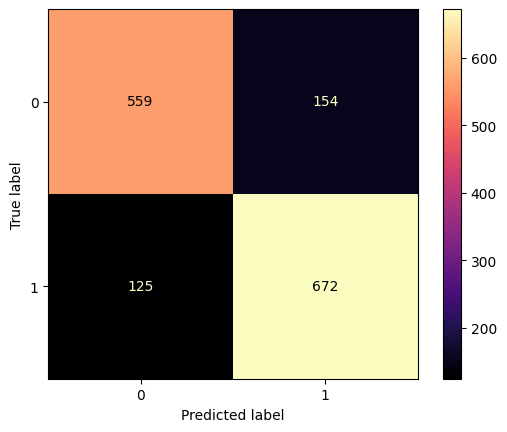

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_true, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='magma')
plt.show()